# Evaluation


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 5]

# Continual Learning Metrics

In [11]:
# Because of a mistake in my implementation
# ["no_of_test"] cannot be used but it can be calculated by ["no_of_correct_prediction"]/["accuracy"]
# but it cannot be calculated when ["accuracy"] == 0

# ((raw["no_of_correct_prediction"]/ raw["accuracy"]).apply(np.ceil))

# the mistake have been fixed now but the data have not updated

def calculateContinualMetircs(raw):
    task_order = raw["task_order"].unique()
    method = raw["method"].unique()
    print(task_order, method)
    
    all_MBase = {k:[] for k in method}
    all_Mnew  = {k:[] for k in method}
    all_Mnow  = {k:[] for k in method}

    for t in task_order:
        rows = raw[raw["task_order"]==t]
        offline = rows[rows["method"]=="offline"]


        for m in method:
            if m=="offline":
                continue

            target = rows[rows["method"]==m]

            # calculate m_base
            _ideal = offline[offline["task_index"]==1]["accuracy"]
            _m = target[target["task_index"]==1][["accuracy", "no_of_test", "no_of_correct_prediction"]]

            _N = len(_m)
            _m = (_m["accuracy"]/float(_ideal)).sum()
            Mbase = float(_m/_N)

            all_MBase[m].append(Mbase)


            _sum = 0.0
            train_session = target["train_session"].unique()
            for s in train_session:
                s = int(s)
                _ideal = offline[offline["task_index"]==s]["accuracy"]

                _m = target[target["train_session"]==str(s)]
                _m = _m[_m["task_index"]==s]["accuracy"]

                assert len(_m)==1

                _sum += float(_m)/float(_ideal)

            if len(train_session)==0:
                all_Mnew[m].append(np.nan)
            else:
                Mnew = _sum/len(train_session)
                all_Mnew[m].append(Mnew)


            _sum = 0.0
            task_index = target["task_index"].unique()
            _m = target[target["train_session"]==str(len(task_index))]
            for t in task_index:
                t = int(t)
                _ideal = offline[offline["task_index"]==t]["accuracy"]
                _m1 = _m[_m["task_index"]==t]["accuracy"]

                assert len(_m1)==1

                _sum += float(_m1)/float(_ideal)

            if len(train_session)==0:
                all_Mnow[m].append(np.nan)
            else:
                Mnow = _sum/len(train_session)
                all_Mnow[m].append(Mnow)

            
    return all_MBase, all_Mnew, all_Mnow



In [5]:
from scipy import stats

def printCLMetrics(all_MBase, all_Mnew, all_Mnow):
    def p(metric, name):
        
        print("Metric: ", name)
        for m in metric:
            avg = np.mean(metric[m])
            err = stats.sem(metric[m])
            print("{0} {1:.3f} {2:.3f}".format(m, avg, err))
        print("=====================")
        print("")
            
            
    p(all_MBase, "M base")
    p(all_Mnew, "M new")
    p(all_Mnow, "M now")
    
    

# CASAS Dataset 👌

In [6]:
# Result from newsrc/result_iter1000-1000_h500-100_all/

folder = "../Results/result_iter1000-1000_h500-100_all/"
raw = pd.read_csv(folder+"results.txt")
raw.columns = [c.strip() for c in raw.columns]

raw.head()
b, n, nw = calculateContinualMetircs(raw)

print("")
printCLMetrics(b, n, nw)


[0 1 2 3 4 5 6 7 8 9] ['offline' 'none' 'exact' 'mp-gan' 'mp-wgan' 'sg-cgan' 'sg-cwgan']

Metric:  M base
offline nan nan
none 0.247 0.025
exact 1.141 0.118
mp-gan 0.687 0.077
mp-wgan 0.701 0.108
sg-cgan 0.592 0.063
sg-cwgan 0.367 0.051

Metric:  M new
offline nan nan
none 1.258 0.073
exact 1.237 0.074
mp-gan 1.257 0.074
mp-wgan 1.256 0.074
sg-cgan 1.258 0.073
sg-cwgan 1.259 0.073

Metric:  M now
offline nan nan
none 0.234 0.018
exact 1.108 0.063
mp-gan 0.803 0.061
mp-wgan 0.823 0.078
sg-cgan 0.652 0.038
sg-cwgan 0.307 0.036



In [7]:
# Result from newsrc/result_iter1000-1000_h500-100_all/

folder = "../Results/result_iter5000-1000_h500-100_all/"
raw = pd.read_csv(folder+"results.txt")
raw.columns = [c.strip() for c in raw.columns]

raw.head()
b, n, nw = calculateContinualMetircs(raw)

print("")
printCLMetrics(b, n, nw)


[0 1 2 3 4 5 6 7 8 9] ['offline' 'none' 'exact' 'mp-gan' 'mp-wgan' 'sg-cgan' 'sg-cwgan']

Metric:  M base
offline nan nan
none 0.300 0.046
exact 1.371 0.170
mp-gan 0.903 0.080
mp-wgan 0.924 0.094
sg-cgan 0.884 0.111
sg-cwgan 0.713 0.047

Metric:  M new
offline nan nan
none 1.222 0.032
exact 1.201 0.029
mp-gan 1.222 0.031
mp-wgan 1.222 0.032
sg-cgan 1.224 0.031
sg-cwgan 1.223 0.031

Metric:  M now
offline nan nan
none 0.265 0.028
exact 1.049 0.010
mp-gan 0.776 0.033
mp-wgan 0.801 0.034
sg-cgan 0.725 0.041
sg-cwgan 0.654 0.037



# PAMAP2 Dataset

In [8]:
# PAMAP2 Dataset with 100 hidden units/layer

folder = "../Results/results_two_datasets/"
raw = pd.read_csv(folder+"results.txt")
raw.columns = [c.strip() for c in raw.columns]


b, n, nw = calculateContinualMetircs(raw)

print("")
printCLMetrics(b, n, nw)


[0 1 2 3 4 5 6 7] ['offline' 'mp-gan' 'mp-wgan' 'sg-cgan' 'sg-cwgan']

Metric:  M base
offline nan nan
mp-gan 0.461 0.073
mp-wgan 0.245 0.011
sg-cgan 0.362 0.046
sg-cwgan 0.298 0.029

Metric:  M new
offline nan nan
mp-gan 1.184 0.024
mp-wgan 1.178 0.024
sg-cgan 1.178 0.026
sg-cwgan 1.177 0.024

Metric:  M now
offline nan nan
mp-gan 0.457 0.026
mp-wgan 0.237 0.010
sg-cgan 0.377 0.036
sg-cwgan 0.233 0.013



In [15]:
# CASAS Dataset; re-run again

folder = "../Results/results_two_datasets.s2/"

raw = pd.read_csv(folder+"results.txt")
raw.columns = [c.strip() for c in raw.columns]



b, n, nw = calculateContinualMetircs(raw)

print("")
printCLMetrics(b, n, nw)

[0 1 2 3 4 5 6 7 8 9] ['offline' 'exact' 'mp-gan' 'mp-wgan' 'sg-cgan' 'sg-cwgan']

Metric:  M base
offline nan nan
exact 1.104 0.083
mp-gan 0.812 0.051
mp-wgan 0.716 0.044
sg-cgan 0.778 0.059
sg-cwgan 0.648 0.047

Metric:  M new
offline nan nan
exact 1.159 0.020
mp-gan 1.192 0.012
mp-wgan 1.190 0.013
sg-cgan 1.192 0.012
sg-cwgan 1.193 0.012

Metric:  M now
offline nan nan
exact 1.070 0.015
mp-gan 0.838 0.022
mp-wgan 0.737 0.022
sg-cgan 0.772 0.037
sg-cwgan 0.651 0.031



In [19]:
# PAMAP2 Dataset with 1000 hidden units/layer (bigger network)

folder = "../Results/results_two_datasets.s4/"
raw = pd.read_csv(folder+"results.txt")
raw.columns = [c.strip() for c in raw.columns]

CSMbase = []
CSMnew = []
CSMnow = []
cmd = raw["cmd"].unique()
cmd = [0,1,2,3,4]
for c in cmd:
    target = raw[raw["cmd"]==c]
    b, n, nw = calculateContinualMetircs(target)

    CSMbase.append(b)
    CSMnew.append(n)
    CSMnow.append(nw)



# Metric:  M base
# offline nan nan
# exact 1.227 0.061
# mp-gan 0.663 0.061
# mp-wgan 0.278 0.020
# sg-cgan 0.780 0.064
# sg-cwgan 0.411 0.044
# =====================

# Metric:  M new
# offline nan nan
# exact 1.135 0.014
# mp-gan 1.153 0.014
# mp-wgan 1.158 0.015
# sg-cgan 1.158 0.014
# sg-cwgan 1.159 0.015
# =====================

# Metric:  M now
# offline nan nan
# exact 1.081 0.015
# mp-gan 0.537 0.025
# mp-wgan 0.268 0.018
# sg-cgan 0.681 0.031
# sg-cwgan 0.306 0.023
# =====================

[0 1] ['offline' 'mp-gan' 'mp-wgan' 'sg-cgan' 'sg-cwgan']
[0 1] ['offline' 'mp-gan' 'mp-wgan' 'sg-cgan' 'sg-cwgan']
[0 1] ['offline' 'mp-gan' 'mp-wgan' 'sg-cgan' 'sg-cwgan']
[0 1] ['offline' 'mp-gan' 'mp-wgan' 'sg-cgan' 'sg-cwgan']
[0 1] ['offline' 'mp-gan' 'mp-wgan' 'sg-cgan' 'sg-cwgan']


In [20]:


import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plotline(values, label, x=[], xticks=[], models=None):
    
    plt.rcParams['figure.figsize'] = [10, 5]
    
    m = [] 
    merr = []
    if models is None:
        models = ["mp-gan", "mp-wgan", "sg-cgan", "sg-cwgan"]
    print(models)
    for model in models:
        
        tmp = []
        tmperr = []
        
        for i, v in enumerate(values):
            avg = np.nanmean(v[model])
            err = stats.sem(v[model], nan_policy="omit")
            tmp.append(avg)
            tmperr.append(err)
        
        m.append(tmp)
        merr.append(tmperr)

    ind = np.arange(len(m[0])) # the x locations for the groups

    fig, ax = plt.subplots()
    
    patterns = [ "-s" , "-o" , "-x" , "-D" , "-+" , "-*", "-2" ]
    for i, model in enumerate(models):
        ax.errorbar(x, m[i], yerr=merr[i], fmt=patterns[i])

    ax.set_title(label)
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.legend(models)


    fig.tight_layout()

    plt.show()





['mp-gan', 'mp-wgan', 'sg-cgan', 'sg-cwgan']


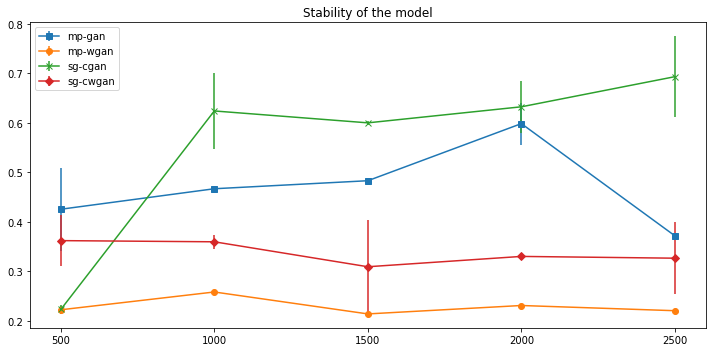

['mp-gan', 'mp-wgan', 'sg-cgan', 'sg-cwgan']


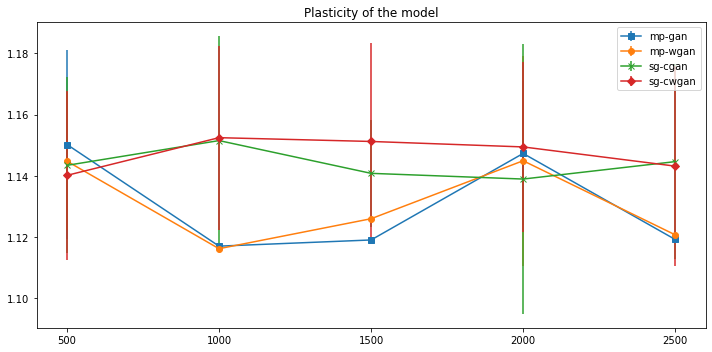

['mp-gan', 'mp-wgan', 'sg-cgan', 'sg-cwgan']


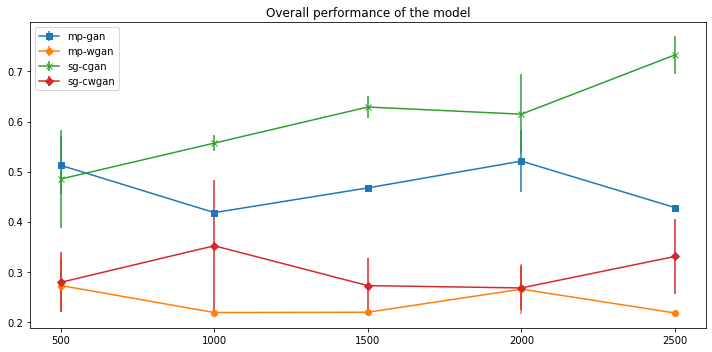

In [24]:
xticks = [500, 1000, 1500, 2000, 2500]

models = None
def fixbugs(data):
    return data

    
plotline(fixbugs(CSMbase), "Stability of the model", x=xticks, models=models)
plotline(fixbugs(CSMnew), "Plasticity of the model", x=xticks, models=models)
plotline(fixbugs(CSMnow),"Overall performance of the model", x=xticks, models=models)